In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tqdm.notebook import tqdm

def StandardScaleData(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


def MinMaxScaleData(data):
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)







def show_res(y_actual, y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))




def actual_vs_pred(y_actual, y_pred):
  pred_y_df=pd.DataFrame(
    {
        "Actual_Value":y_actual,
        "Predicted_Value":y_pred,
        "Difference":y_actual-y_pred
    }
    )

  sns.set(rc={'figure.figsize':(10,20)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )

def single_pred(model,data):
  test_sub = {
    'open':[data[0]],
    'high':[data[1]],
    'low':[data[2]]
  }
  test_sub_df = pd.DataFrame(test_sub)

  ex_specie = np.array(test_sub_df.iloc[0]).reshape(1,-1)

  return model.predict(ex_specie)




def test_other_file(model,f_list):
  for i in tqdm(f_list):
    print()
    print(os.path.basename(i))
    test_dataset = pd.read_json(i,typ='series')
    test_df = pd.DataFrame(test_dataset['data'])

    test_X=df.iloc[:,0:3]
    test_y=df.loc[:,'close']

    pred_y = model.predict(test_X)

    show_res(test_y,pred_y)
    print("____________________________________________")
    print("___________                  _______________")
    print()

In [98]:
import numpy as np
import pandas as pd
import os
from glob2 import glob

In [99]:
path = "/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Intraday-1m-ohlcv/APOLLOHOSP"

In [100]:
file_list = glob(path+"/*")

In [101]:
#dataset = pd.read_json("/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Historical-ohlcv/ADANIENT/ADANIENT-2000-01-01-2023-05-31.json",typ='series')
dataset = pd.read_json(file_list[0],typ='series')

In [102]:
dataset.head()

status                                               success
remarks                                                     
data       {'open': [2499.9, 2515.0, 2530.3, 2518.1, 2525...
dtype: object

In [103]:
df = pd.DataFrame(dataset['data'])

In [104]:
df.shape

(375, 6)

In [105]:
df.head(5)

,open,high,low,close,volume,start_Time
0,2499.90,2520.55,2499.00,2513.15,108665.0,2023-06-01 09:15:00
1,2515.00,2533.20,2514.15,2530.30,64322.0,2023-06-01 09:16:00
2,2530.30,2530.55,2516.05,2516.35,40636.0,2023-06-01 09:17:00
3,2518.10,2527.75,2515.00,2527.75,25992.0,2023-06-01 09:18:00
4,2525.95,2536.65,2525.95,2528.85,35348.0,2023-06-01 09:19:00


#Spliting : X and y

In [106]:
X=df.iloc[:,0:3]
y=df.loc[:,'close']

#Spliting: Training and Testing

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



---



#Training Sections

##Kernel Ridge Regression

In [109]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)

In [110]:
show_res(y_test,y_pred)

Mean absolute error = 0.65
Mean squared error = 0.83
Median absolute error = 0.53
Explain variance score = 0.99
R2 score = 0.99


In [111]:
X.iloc[0]

open    2499.90
high    2520.55
low     2499.00
Name: 0, dtype: float64

In [112]:
y.iloc[0]

2513.15

In [113]:
single_pred(krr,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


array([2515.37755137])

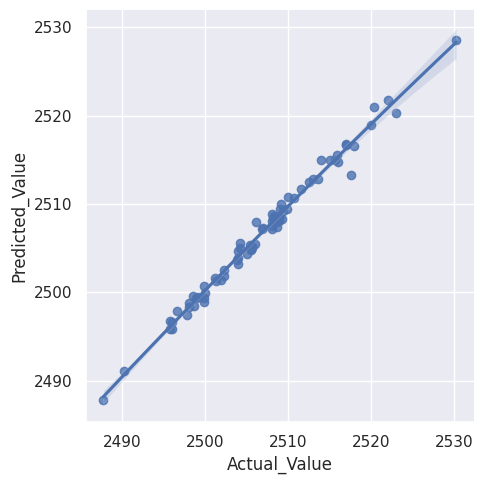

In [114]:
actual_vs_pred(y_test,y_pred)

##Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [116]:
show_res(y_test,y_pred)

Mean absolute error = 0.68
Mean squared error = 0.88
Median absolute error = 0.52
Explain variance score = 0.99
R2 score = 0.99


In [117]:
X_test.iloc[1]

open    2500.0
high    2500.0
low     2499.0
Name: 296, dtype: float64

In [118]:
y_test.iloc[1]

2499.9

In [119]:
single_pred(lin_reg,list(X.iloc[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2528.58183436])

##Decision Tree Regressor

In [120]:
from sklearn.tree import DecisionTreeRegressor

deci_regr = DecisionTreeRegressor()
deci_regr.fit(X_train, y_train)
y_pred = deci_regr.predict(X_test)

In [121]:
show_res(y_test,y_pred)

Mean absolute error = 1.35
Mean squared error = 5.76
Median absolute error = 0.85
Explain variance score = 0.9
R2 score = 0.9


In [122]:
X_test.iloc[1]

open    2500.0
high    2500.0
low     2499.0
Name: 296, dtype: float64

In [123]:
y_test.iloc[1]

2499.9

In [124]:
single_pred(deci_regr,list(X.iloc[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([2516.55])

##Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


In [126]:
show_res(y_test,y_pred)

Mean absolute error = 0.95
Mean squared error = 3.99
Median absolute error = 0.54
Explain variance score = 0.93
R2 score = 0.93


In [127]:
X_test.iloc[1]

open    2500.0
high    2500.0
low     2499.0
Name: 296, dtype: float64

In [128]:
y_test.iloc[1]

2499.9

In [129]:
single_pred(rf_reg,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2512.5245])

###Lasso Regressor

In [130]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_test)

In [131]:
show_res(y_test,y_pred)

Mean absolute error = 0.95
Mean squared error = 3.99
Median absolute error = 0.54
Explain variance score = 0.93
R2 score = 0.93


In [132]:
X_test.iloc[1]

open    2500.0
high    2500.0
low     2499.0
Name: 296, dtype: float64

In [133]:
y_test.iloc[1]

2499.9

In [134]:
single_pred(lasso,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([2514.62131718])

#Testng for another dataset

##With Kernel Ridge Regression

In [135]:
test_other_file(krr,file_list)



  0%|          | 0/23 [00:00<?, ?it/s]


ADANIENT-1m-2023-06-01.json
Mean absolute error = 0.66
Mean squared error = 0.81
Median absolute error = 0.55
Explain variance score = 0.98
R2 score = 0.98
____________________________________________
___________                  _______________


ADANIENT-1m-2023-06-09.json
Mean absolute error = 0.66
Mean squared error = 0.81
Median absolute error = 0.55
Explain variance score = 0.98
R2 score = 0.98
____________________________________________
___________                  _______________


ADANIENT-1m-2023-06-05.json
Mean absolute error = 0.66
Mean squared error = 0.81
Median absolute error = 0.55
Explain variance score = 0.98
R2 score = 0.98
____________________________________________
___________                  _______________


ADANIENT-1m-2023-05-24.json
Mean absolute error = 0.66
Mean squared error = 0.81
Median absolute error = 0.55
Explain variance score = 0.98
R2 score = 0.98
____________________________________________
___________                  _______________


ADANIEN